Demo MechincalAssemblt class
------------------------------

The goal of this routine is to demostrate the new __MechanicalAssembly__ class implemented in AMfe. In order to so, we will solve a problem with multiple elastic bodies which are connected by bound constraints.
Different meshes will be importanted and modified by __translation__ and __rot_z__ methods.


Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************

*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/ring_connection.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/ring_connection.msh successfully imported. 
Assign a material to a physical group.
*************************************************************

*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/ring_free.msh
Mesh H:\TUM-PC\Dokumente\Pr

No handles with labels found to put in legend.
No handles with labels found to put in legend.


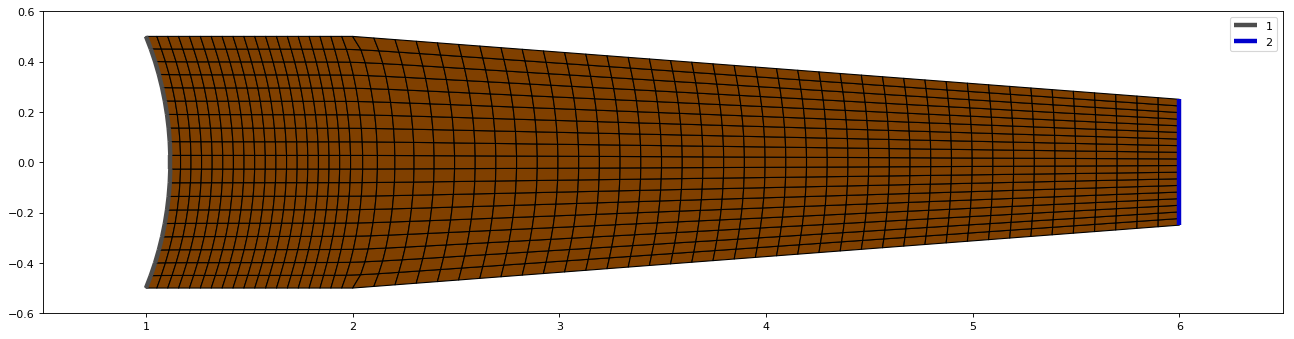

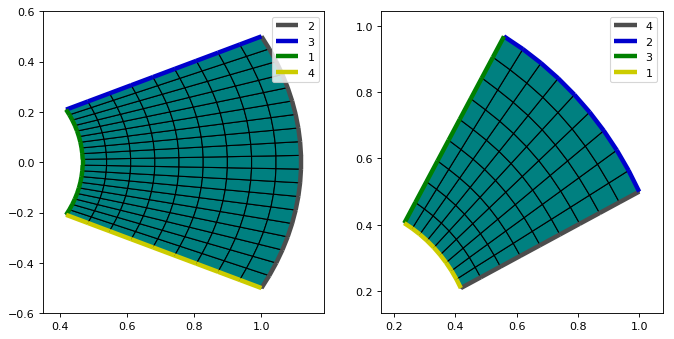

In [1]:
# importaint libraries
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd

# mesh files to be imported
msh_dict = {}
msh_dict[1] =  amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/ring_connection.msh')
msh_dict[3] = amfe.amfe_dir('meshes/test_meshes/ring_free.msh')

# id of physical domain
domain_id = {}
domain_id[1] = 3
domain_id[2] = 6
domain_id[3] = 6

# importing mesh 1
m1 = amfe.Mesh()
m1.import_msh(msh_dict[1])

# importing mesh 2
m2 = amfe.Mesh()
m2.import_msh(msh_dict[2])

# importing mesh 3
m3 = amfe.Mesh()
m3.import_msh(msh_dict[3])


fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(m1,ax1)


fig, (ax2,ax3) =plt.subplots(1, 2, figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(m2,ax2)

amfe.plot_mesh(m3,ax3)

plt.show()


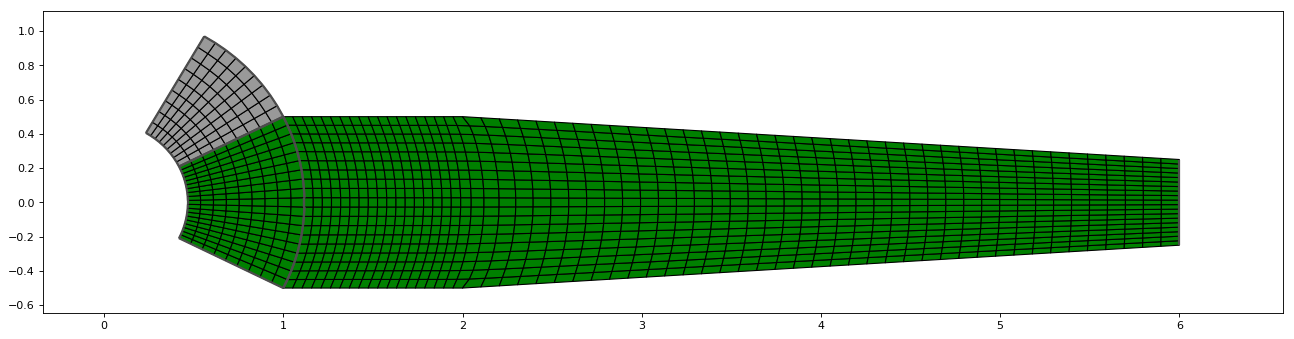

In [2]:
fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(m1,ax1,False)
amfe.plot_mesh(m2,ax1,False)
amfe.plot_mesh(m3,ax1,False)
plt.show()

Let us now use some Methods from __MechanicalAssebmly__ in order to create a single domain using components 2 and 3.

In [3]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# append domains to MechanicalAssembly
my_system = amfe.MechanicalAssembly()

submesh1 = m1.set_domain('phys_group',domain_id[1])
submesh2 = m2.set_domain('phys_group',domain_id[2])
submesh3 = m3.set_domain('phys_group',domain_id[3])

my_system.append_domain(submesh1, my_material, 1)
my_system.append_domain(submesh2, my_material, 2)
my_system.append_domain(submesh3, my_material, 3)
my_system.update_global_system()


No handles with labels found to put in legend.


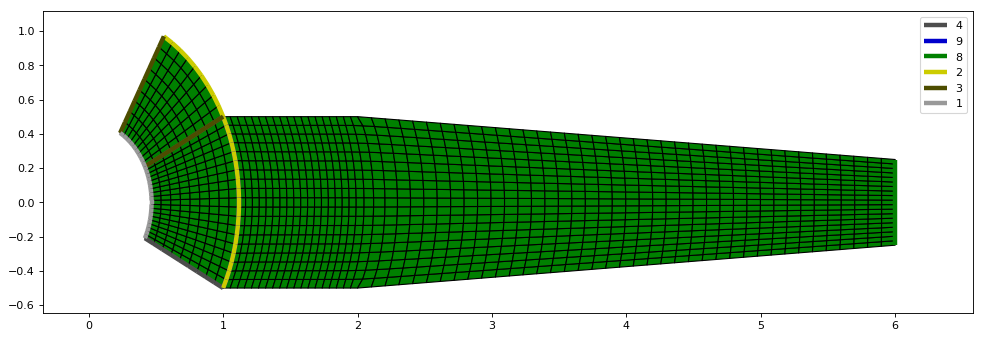

In [4]:
# replacing phys tags to avoid conflict
my_system.change_domain_physical_tag(1,2,8)
my_system.change_domain_physical_tag(1,1,9)
my_system.change_domain_physical_tag(1,3,6)
my_system.update_global_system()

# select submesh for interfaces
sub_int1 = my_system.get_submesh(2,3)
sub_int2 = my_system.get_submesh(3,4)
my_system.add_bonded_interface_constraint(sub_int1,sub_int2)

sub_int3 = my_system.get_submesh(1,9)
sub_int4 = my_system.get_submesh(2,2)
my_system.add_bonded_interface_constraint(sub_int3,sub_int4)

new_mesh = my_system.get_global_mesh()

fig, ax1=plt.subplots(1,figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh,ax1)
plt.show()



In [5]:


# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

value = 1e8
my_comp = amfe.MechanicalSystem()
my_comp.set_mesh_obj(new_mesh)
my_comp.set_domain(6,my_material)
my_comp.apply_dirichlet_boundaries(1, 'xy')
my_comp.apply_neumann_boundaries(8, value, 'normal')




 phys_group 6 with 1354 elements successfully added.
Total number of elements in mesh: 1354
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1354 elements and 2900 dofs.
Time taken for preallocation: 0.01 seconds.

 phys_group 1 with 29 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 29
Total number of constrained dofs: 58
*************************************************************

 phys_group 8 with 19 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 19
Total number of elements in mesh: 1354
*************************************************************


In [6]:
s = amfe.LinearStaticsSolver(my_comp)
s.solve()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_comp, factor=scale, ax = ax1)
    plt.show()
    
interact(plot_static,scale=(0,1000,5))  

Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


A Jupyter Widget

<function __main__.plot_static>

Extract interface node from sub_3 and sub_2
Extract interface node from sub_3 and sub_4
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from sub_1 and sub_2 already extracted
Interface nodes from sub_4 and sub_3 already extracted
Extract interface node from sub_4 and sub_5
Interface nodes from sub_5 and sub_4 already extracted
Extract interface node from sub_3 and sub_2
Extract interface node from sub_3 and sub_4
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from sub_1 and sub_2 already extracted
Interface nodes from sub_4 and sub_3 already extracted
Extract interface node from sub_4 and sub_5
Interface nodes from sub_5 and sub_4 already extracted
Extract interface node from sub_3 and sub_2
Extract interface node from sub_3 and sub_4
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from 

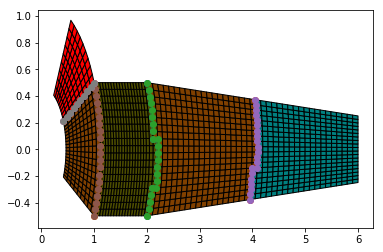

In [7]:
# select submesh for Neumann B.C
sub_neu1 = my_system.get_submesh(1,8)

# select submesh for Dirichlet
sub_dir1 = my_system.get_submesh(2,1)
sub_dir2 = my_system.get_submesh(3,1)

my_system.apply_neumann_boundaries(sub_neu1,value)
my_system.apply_dirichlet_boundaries(sub_dir1,0.0,'xy')
my_system.apply_dirichlet_boundaries(sub_dir2,0.0,'xy')


domain = my_system.update_domain()
my_system.split_in_partitions()

domain = my_system

amfe.plot_domain(domain)
plt.show()

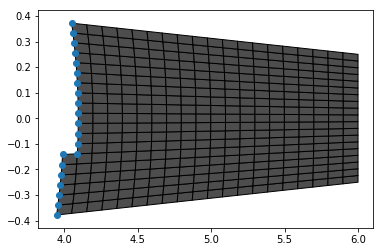

amfe.material.KirchhoffMaterial(210000000000.000000,0.300000,7860.000000,True,0.100000)


In [8]:
amfe.plot_submesh(domain.groups[1])
plt.show()

g1 = domain.groups[1]
el_list = g1.neumann_submesh[0].elements_list

print(g1.__material__)

amfe.plot_submesh(g1)

In [9]:
super_domain = amfe.SuperDomain(domain.groups)

B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])

zero_vector = np.zeros(n_int+n_null)

A1 = np.hstack((Kd,BTGT,B.T))
A2 = np.hstack((GB,block_zero_1))
A3 = np.hstack((B,block_zero_2))


A = np.vstack((A1,A2,A3))
b = np.concatenate((fd,zero_vector))

Ainv = np.linalg.pinv(A)
x = Ainv.dot(b)
#x = np.linalg.solve(A,b)

u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 814 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 816 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 368 elements and 816 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 171 elements and 400 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 81 elements and 200 dofs.
Time taken for preallocation: 0.00 seconds.


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [10]:
u = super_domain.eval_subdomain_displacement(lambda_dual,alpha_dual)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,1000,5))  

A Jupyter Widget

<function __main__.plot_static>

In [11]:
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
alpha = x[n_int:]

global_alpha = alpha

u = super_domain.eval_subdomain_displacement(global_lambda,alpha)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,1000,5))        

A Jupyter Widget

<function __main__.plot_static>

In [12]:
#new_mesh_90 = new_mesh.rot_z(90)
#fig, ax1=plt.subplots(1,figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
#amfe.plot_mesh(new_mesh_90,ax1)
#plt.show()

In [13]:
angle_list = np.arange(87,88,0.1)

In [14]:
print(angle_list)

[ 87.   87.1  87.2  87.3  87.4  87.5  87.6  87.7  87.8  87.9]
